In [7]:
import streamlit as st
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Flatten
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Function to create and train the RNN model
def train_model(X, y, num_chars):
    model = Sequential([
        Embedding(num_chars, 50, input_length=X.shape[1]),
        LSTM(100, return_sequences=True),
        Flatten(),
        Dense(num_chars, activation='softmax')
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
    model.fit(X, y, batch_size=256, epochs=5)
    return model

# Load the Shakespeare dataset
with open("shakespeare.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [8]:

# Preprocess the text and create sequences for training
SEQ_LENGTH = 100
X, y, chars, char_to_index = preprocess_text(text, SEQ_LENGTH)
num_chars = len(chars)
index_to_char = {i: char for char, i in char_to_index.items()}

# Train the RNN model
model = train_model(X, y, num_chars)

# Function to visualize embeddings using t-SNE
def visualize_embeddings(embeddings, chars):
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_tsne = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.5)
    for i, char in enumerate(chars):
        plt.annotate(char, (embeddings_tsne[i, 0], embeddings_tsne[i, 1]))
    plt.title('t-SNE Visualization of Character Embeddings')
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.show()

Epoch 1/5
4357/4357 [==============================] - 815s 187ms/step - loss: 2.2377
Epoch 2/5
4357/4357 [==============================] - 870s 200ms/step - loss: 1.7735
Epoch 3/5
4357/4357 [==============================] - 1696s 389ms/step - loss: 1.6210
Epoch 4/5
4357/4357 [==============================] - 992s 228ms/step - loss: 1.5342
Epoch 5/5
4357/4357 [==============================] - 4101s 941ms/step - loss: 1.4755


In [9]:
from keras.models import save_model
# Save model
save_model(model, "model_LSTM.h5")

C:\Users\Asus\AppData\Local\Temp\ipykernel_15308\3547277000.py:3: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, "model_LSTM.h5")


In [11]:
# Function to generate text using the trained model
def generate_text(model, seed_text, char_to_index, index_to_char, seq_length=100, num_chars=200):
    generated_text = seed_text
    for _ in range(num_chars):
        # Pad the seed text if its length is less than the sequence length
        while len(seed_text) < seq_length:
            seed_text = " " + seed_text
        X_pred = np.zeros((1, seq_length))
        for t, char in enumerate(seed_text):
            X_pred[0, t] = char_to_index[char]
        pred = model.predict(X_pred, verbose=0)[0]
        next_index = np.random.choice(len(pred), p=pred)
        next_char = index_to_char[next_index]
        generated_text += next_char
        seed_text = seed_text[1:] + next_char
    return generated_text

# Generate text using the trained LSTM model
generated_text = generate_text(model, seed_text="The quick brown", char_to_index=char_to_index, index_to_char=index_to_char, seq_length=SEQ_LENGTH, num_chars=200)
print(generated_text)

The quick brown:
Thou arsoint and can to this a very wask
With it tender ladien,
with out omsnee.

PETRUCHIO:
Why, go, let us sigh.

KING RICHARD III:
Well, love shall so bus I must day to?

DUKE VINCENTIO:
Ir misso


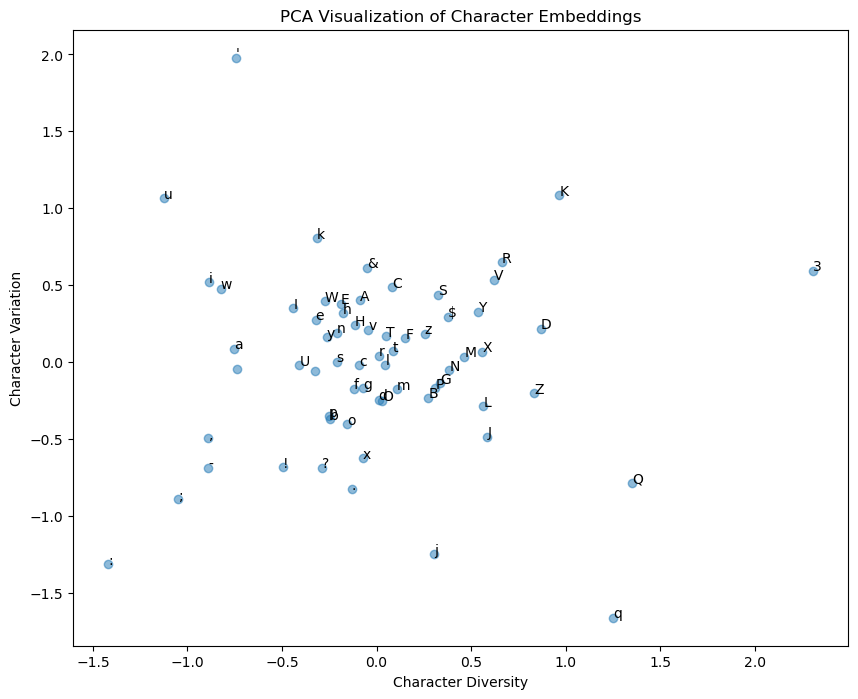

In [16]:
from sklearn.decomposition import PCA

def visualize_embeddings(embeddings, chars):
    pca = PCA(n_components=2)
    embeddings_pca = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.5)
    for i, char in enumerate(chars):
        plt.annotate(char, (embeddings_pca[i, 0], embeddings_pca[i, 1]))
    plt.title('PCA Visualization of Character Embeddings')
    plt.xlabel('Character Diversity')
    plt.ylabel('Character Variation')
    plt.show()  
    
# Visualize the embeddings using PCA
visualize_embeddings(model.layers[0].get_weights()[0], chars)